In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('/content/data_cleaned.csv')


In [29]:
df=data[0:10000]

In [30]:
statements = df['statement'].values
labels = df['speaker'].values

In [31]:
df.head()

,statement,speaker
0,"Hi doctor,I am just wondering what is abutting...",Patient
1,Hi. I have gone through your query with dilige...,Doctor
2,"Hi doctor, I am a 26 year old male. I am 5 fee...",Patient
3,Hello. I have gone through your information an...,Doctor
4,"Hello doctor, I am 48 years old. I am experien...",Patient


In [32]:
df.isna().sum()

statement    0
speaker      0
dtype: int64

In [33]:
df.dropna()

,statement,speaker
0,"Hi doctor,I am just wondering what is abutting...",Patient
1,Hi. I have gone through your query with dilige...,Doctor
2,"Hi doctor, I am a 26 year old male. I am 5 fee...",Patient
3,Hello. I have gone through your information an...,Doctor
4,"Hello doctor, I am 48 years old. I am experien...",Patient
...,...,...
9995,"​Hello doctor, I have been seeing a PCP for a ...",Patient
9996,Hello. I had gone through all the details tha...,Doctor
9997,"Hello doctor, I am 18 years old. I have chroni...",Patient
9998,Hi. I have gone through your message and under...,Doctor


In [34]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

In [35]:
# Vectorize text data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(statements).toarray()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
time_steps = 1  # Since we are using TF-IDF vectorization, each document is considered as a single time step
input_features = X_train.shape[1]
X_train_rnn = X_train.reshape(-1, time_steps, input_features)
X_test_rnn = X_test.reshape(-1, time_steps, input_features)

In [42]:
model = Sequential([
    SimpleRNN(128, input_shape=(time_steps, input_features), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [43]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [45]:
history = model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=5, batch_size=32)


Epoch 1/5
200/200 [==============================] - 10s 49ms/step - loss: 1.2051e-04 - accuracy: 1.0000 - val_loss: 0.0262 - val_accuracy: 0.9919
Epoch 2/5
200/200 [==============================] - 10s 49ms/step - loss: 7.7537e-05 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 0.9919
Epoch 3/5
200/200 [==============================] - 10s 49ms/step - loss: 5.1415e-05 - accuracy: 1.0000 - val_loss: 0.0283 - val_accuracy: 0.9912
Epoch 4/5
200/200 [==============================] - 9s 47ms/step - loss: 3.5601e-05 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 0.9919
Epoch 5/5
200/200 [==============================] - 10s 51ms/step - loss: 2.5537e-05 - accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 0.9912


In [46]:
test_loss, test_accuracy = model.evaluate(X_test_rnn, y_test)
print("Test accuracy is: {:.2f}%".format(test_accuracy * 100))

63/63 [==============================] - 2s 23ms/step - loss: 0.0179 - accuracy: 0.9930
Test accuracy is: 99.30%


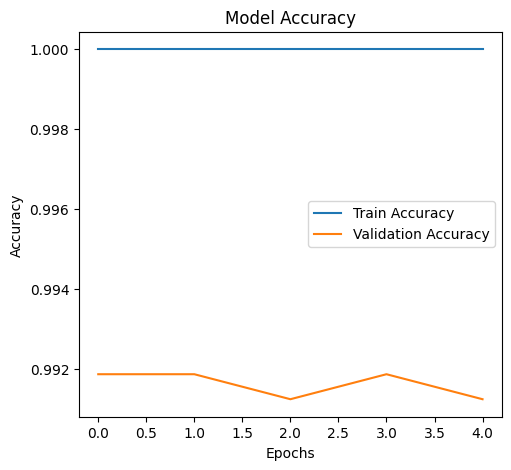

In [47]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()


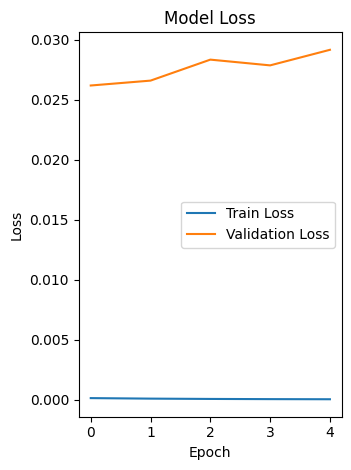

In [48]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()